# **Real** vs **Fake** face detection using densenet

1/1 [==============================] - 0s 30ms/step


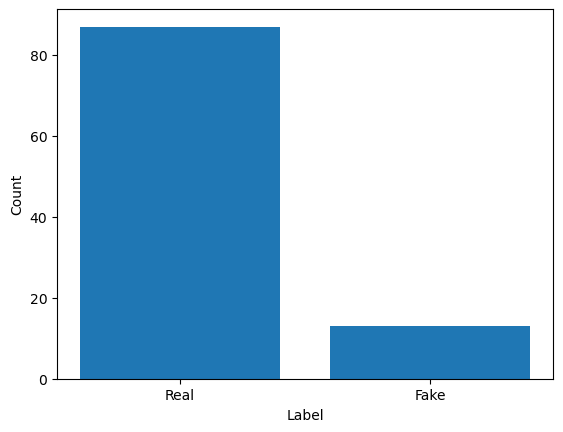

In [7]:

import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/kaggle/input/densenet/densenet.h5')

import os

# Define a directory containing the images
image_dir = '/kaggle/input/thispersondoesnotexist/thispersondoesnotexist'

# Initialize counters
fake_count = 0
real_count = 0

# Loop through the images in the directory
for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        image_path = os.path.join(image_dir, filename)
        test_image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256, 3))
        test_image_arr = tf.keras.preprocessing.image.img_to_array(test_image)
        test_image_arr = np.expand_dims(test_image_arr, axis=0)
        test_image_arr = test_image_arr / 255.0

        result = model.predict(test_image_arr)
        
        if result[0][0] > 0.5:
            real_count += 1
        else:
            fake_count += 1

# Create a bar graph
labels = ['Real', 'Fake']
counts = [real_count, fake_count]
plt.bar(labels, counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


**Single image**

1/1 [==============================] - 2s 2s/step


Text(0.5, 1.0, 'This image is 98.90% Fake and 1.10% Real.')

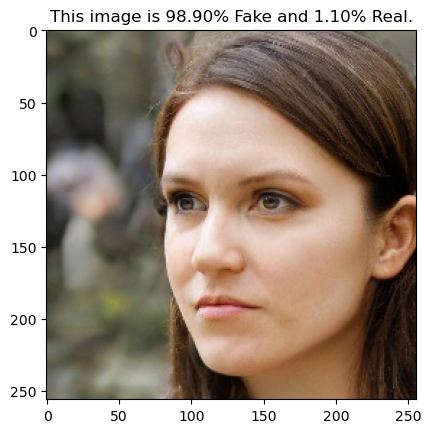

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/kaggle/input/densenet/densenet.h5')

test_image = tf.keras.preprocessing.image.load_img('/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/fake/00V5CZZSSO.jpg', target_size=(256, 256, 3))
plt.imshow(test_image)

#fake example
test_image_arr = tf.keras.preprocessing.image.img_to_array(test_image)
test_image_arr = np.expand_dims(test_image, axis=0)
test_image_arr = test_image_arr/255.


result = model.predict(test_image_arr)

plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")